In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv(r"train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df.drop("PassengerId", axis = 1)
df = df.drop("Name", axis = 1)
df = df.drop("Ticket", axis = 1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,G6,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

SEX :  2
Sex
female    314
male      577
Name: count, dtype: int64


CABIN :  147
Cabin
D56            1
B78            1
B30            1
D10 D12        1
A5             1
              ..
C22 C26        3
D              3
G6             4
B96 B98        4
C23 C25 C27    4
Name: count, Length: 147, dtype: int64


EMBARKED :  3
Embarked
Q     77
C    168
S    644
Name: count, dtype: int64




In [ ]:
df["Cabin"] = df["Cabin"].apply(lambda x: x[0] if type(x) == str else x)

In [ ]:
df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,8,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,C,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,59,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


In [ ]:
categorical_cols = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_cols.append(column)
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')


SEX :  2
Sex
female    314
male      577
Name: count, dtype: int64


CABIN :  8
Cabin
T     1
G     4
F    13
A    15
E    32
D    33
B    47
C    59
Name: count, dtype: int64


EMBARKED :  3
Embarked
Q     77
C    168
S    644
Name: count, dtype: int64




In [ ]:
df.loc[:, categorical_cols]

,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C,C
2,female,NaN,S
3,female,C,S
4,male,NaN,S
...,...,...,...
886,male,NaN,S
887,female,B,S
888,female,NaN,S
889,male,C,C


In [ ]:
onehot = preprocessing.OneHotEncoder(drop = "if_binary").fit(df.loc[:, categorical_cols])
onehotdf = np.array(onehot.transform(df.loc[:, categorical_cols]).toarray())
encoded_df = pd.DataFrame(onehotdf, columns=onehot.get_feature_names_out(categorical_cols))
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
imputer_numerical = SimpleImputer(strategy='mean')
df[['Age']] = imputer_numerical.fit_transform(df[['Age']])

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0,3,NaN,1,2,23.4500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.corr() # It will show correlation matrix

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.026456,-0.316912,0.168240,0.003650,-0.155660,0.060095
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,-0.204934,-0.369572,-0.417048,-0.278690,-0.230091,0.011063,0.055561,-0.052496,0.725541,-0.243292,0.221009,0.081720,-0.074282
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.121920,0.091394,0.113149,0.132319,0.117211,-0.077209,-0.077253,0.039469,-0.233123,0.032024,-0.013855,-0.027121,0.074099
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.046266,-0.034538,0.029251,-0.017575,-0.036865,0.001706,-0.001402,-0.015907,0.040460,-0.059528,-0.026354,0.070941,-0.022508
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.040325,0.056498,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.015878,-0.036987,-0.011069,-0.081228,0.063036,-0.022467
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,0.019549,0.386297,0.364318,0.098878,0.053717,-0.033093,-0.025180,0.002224,-0.482075,0.269335,-0.117216,-0.166603,0.045646
Sex_male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,0.078271,-0.109689,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,0.024728,0.140391,-0.082853,-0.074115,0.125722,-0.064296
Cabin_A,0.022287,-0.204934,0.121920,-0.046266,-0.040325,0.019549,0.078271,1.000000,-0.030880,-0.034846,-0.025663,-0.025256,-0.015923,-0.008787,-0.004386,-0.240136,0.093040,-0.040246,-0.055383,-0.006207
Cabin_B,0.175095,-0.369572,0.091394,-0.034538,0.056498,0.386297,-0.109689,-0.030880,1.000000,-0.062841,-0.046280,-0.045547,-0.028715,-0.015847,-0.007910,-0.433053,0.168642,-0.072579,-0.123057,0.200996
Cabin_C,0.114652,-0.417048,0.113149,0.029251,0.030736,0.364318,-0.058649,-0.034846,-0.062841,1.000000,-0.052225,-0.051398,-0.032403,-0.017883,-0.008926,-0.488683,0.113952,-0.049776,-0.066995,-0.012631


In [ ]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

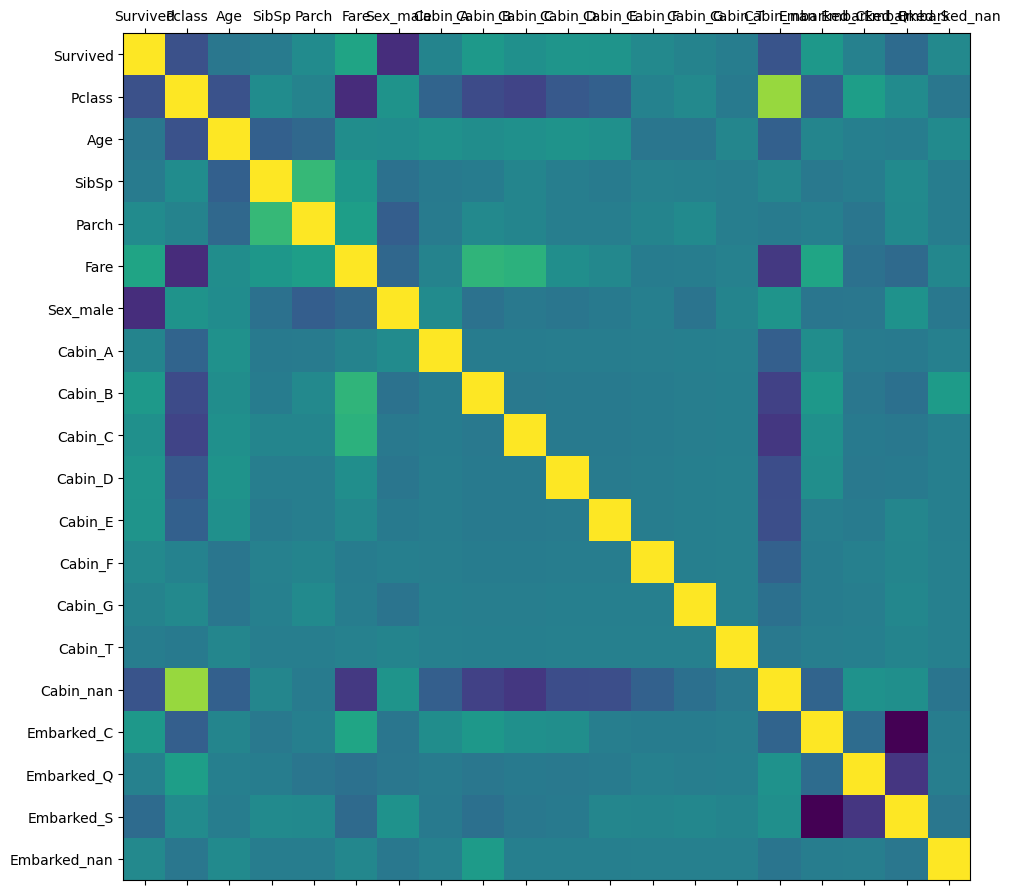

In [ ]:
plot_corr(df)

Very little correlation between features can be observed.

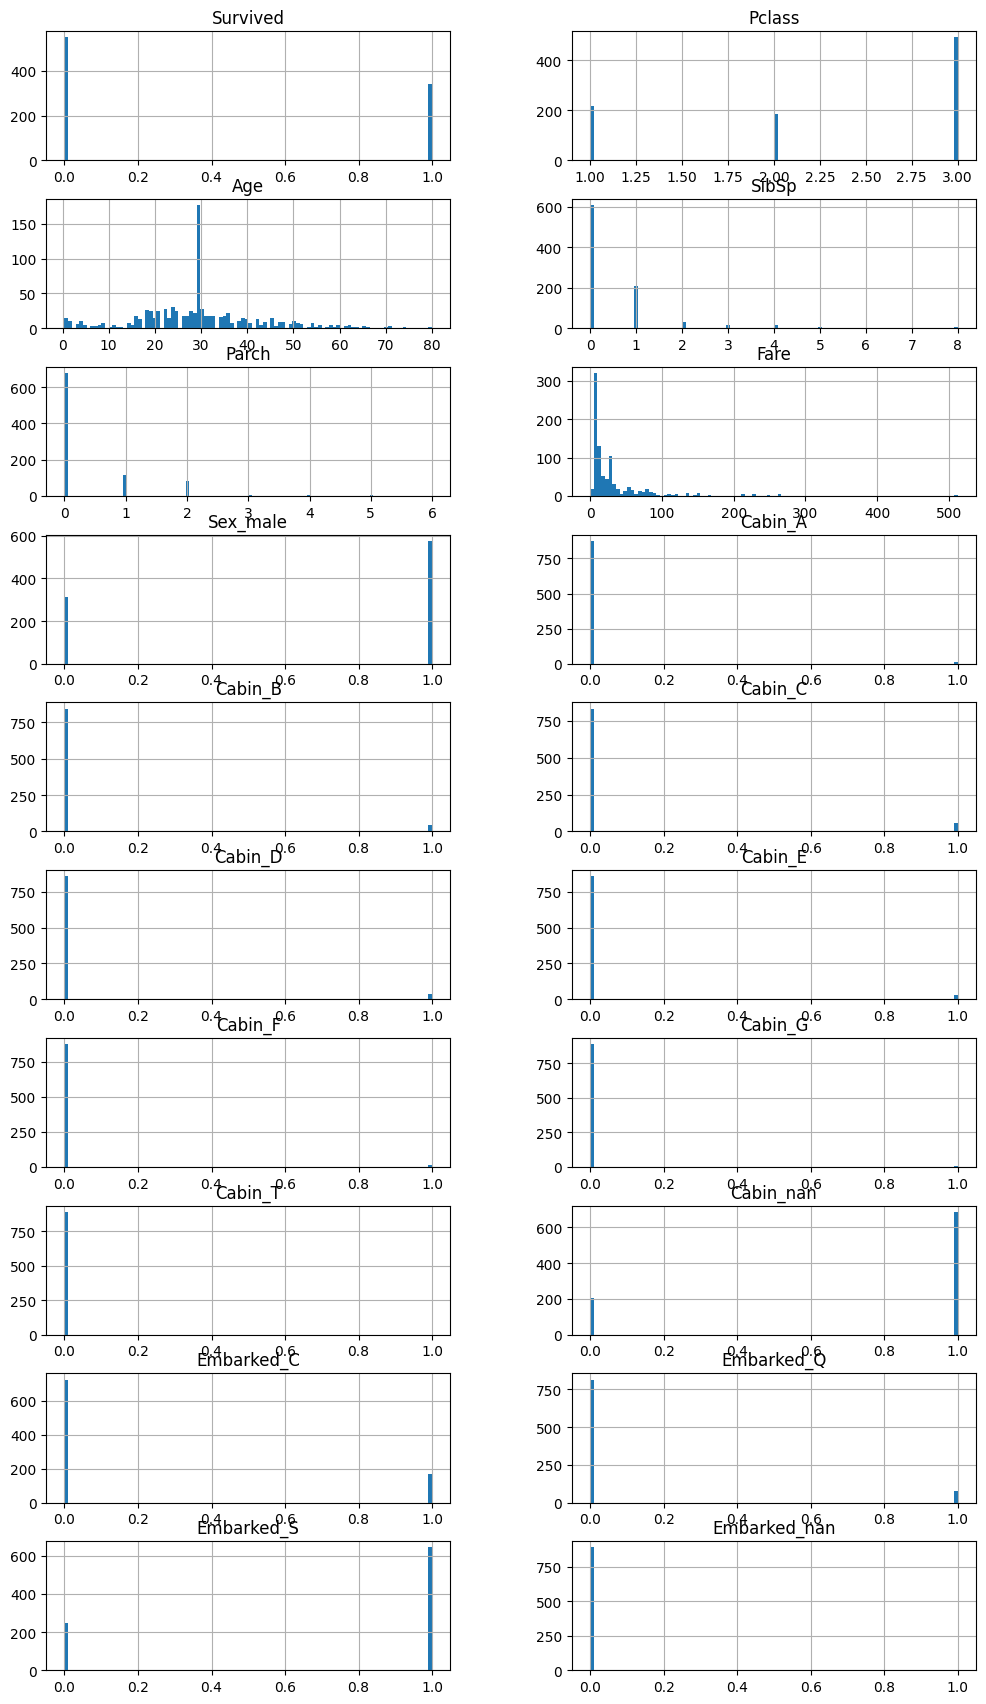

In [ ]:
columns = list(df) # Excluding Outcome column which has only
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

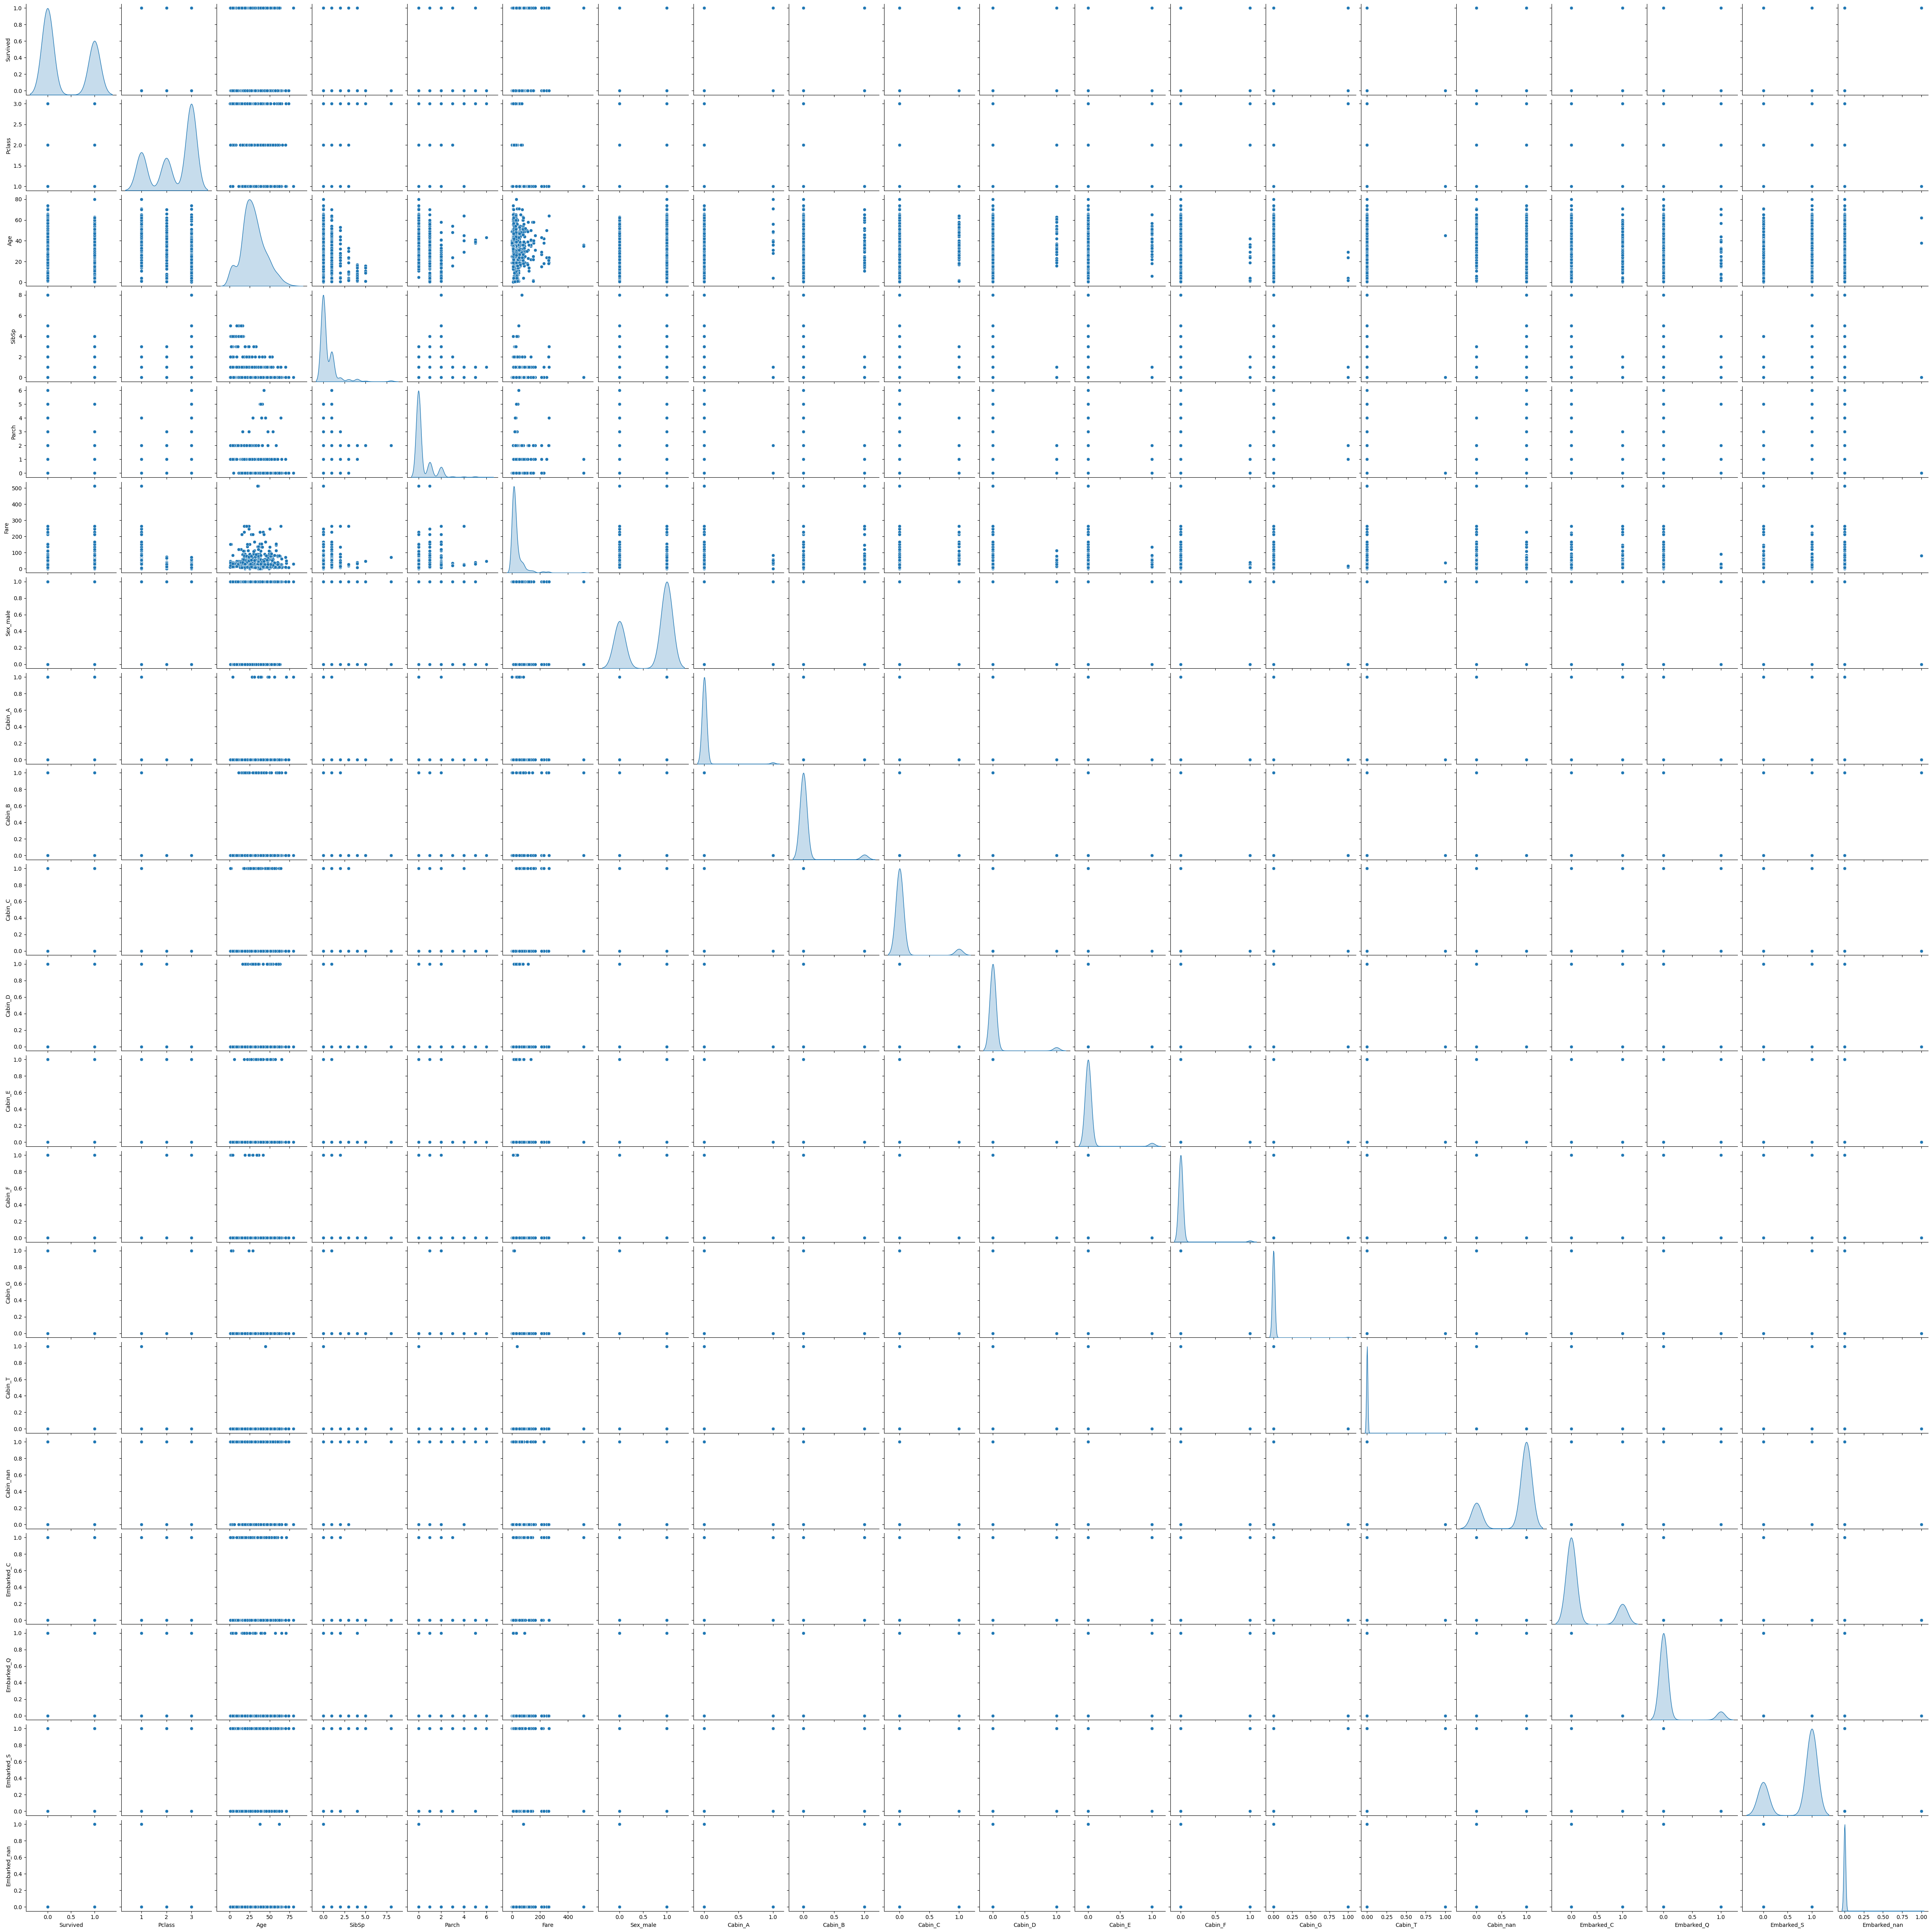

In [ ]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
survived_samples = len(df[df['Survived'] == 1])
died_samples = len(df[df['Survived'] == 0])
print(f"Survived samples: {survived_samples/(survived_samples+died_samples) * 100}")
print(f"Died samples: {died_samples/(survived_samples+died_samples) * 100}")

Survived samples: 38.38383838383838
Died samples: 61.61616161616161


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("Survived", axis = 1)
Y = df["Survived"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
114,3,17.000000,0,0,14.4583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
874,2,28.000000,1,0,24.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
76,3,29.699118,0,0,7.8958,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
876,3,20.000000,0,0,9.8458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
674,2,29.699118,0,0,0.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
y_train.head()

,Survived
114,0
874,1
76,0
876,0
674,0


In [ ]:
print("Original Survived Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Survived'] == 1]), ((len(df.loc[df['Survived'] == 1])/len(df.index)) * 100)))
print("Original Died Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Survived'] == 0]), ((len(df.loc[df['Survived'] == 0])/len(df.index)) * 100)))
print("")
print("Training Survived Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Died Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Survived Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Died Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Survived Values    : 342 (38.38%)
Original Died Values   : 549 (61.62%)

Training Survived Values    : 227 (36.44%)
Training Died Values   : 396 (63.56%)

Test Survived Values        : 115 (42.91%)
Test Died Values       : 153 (57.09%)



In [ ]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.726698 -0.032108 -0.299928  0.063459  0.002501 -2.561686  0.153472   

          7        8         9       10        11        12   13        14  \
0  0.431921 -0.35766  0.731509  1.61444  0.602217 -0.006983  0.0 -0.235357   

         15        16        17        18  intercept  
0  1.097819  0.934117  0.661132  0.240491   2.933559  


In [ ]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7723880597014925


The model has 77.2 % accuracy.

<Axes: >

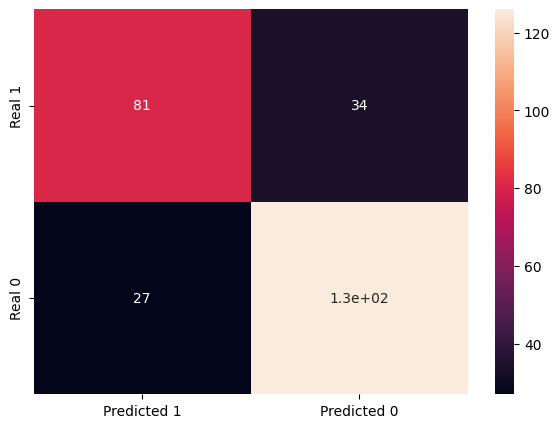

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Real 1","Real 0"]],
                  columns = [i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
X_predict = pd.read_csv(r"test.csv")

In [ ]:
X_predict.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
X_predict.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
imputer_numerical = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

X_predict[['Cabin']] = imputer_categorical.fit_transform(X_predict[['Cabin']])
X_predict[['Age']] = imputer_numerical.fit_transform(X_predict[['Age']])
X_predict[['Fare']] = imputer_numerical.fit_transform(X_predict[['Fare']])


In [ ]:
X_predict["Cabin"] = X_predict["Cabin"].apply(lambda x: x[0] if type(x) == str else x)

In [ ]:
onehotdf = np.array(onehot.transform(X_predict.loc[:, categorical_cols]).toarray())
encoded_df = pd.DataFrame(onehotdf, columns=onehot.get_feature_names_out(categorical_cols))
X_predict = pd.concat([X_predict.drop(columns=categorical_cols), encoded_df], axis=1)

In [ ]:
X_predict = X_predict.drop("PassengerId", axis = 1)
X_predict = X_predict.drop("Name", axis = 1)
X_predict = X_predict.drop("Ticket", axis = 1)

In [ ]:
X_predict

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,3,34.50000,0,0,7.8292,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,47.00000,1,0,7.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,62.00000,0,0,9.6875,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,27.00000,0,0,8.6625,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,22.00000,1,1,12.2875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
414,1,39.00000,0,0,108.9000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415,3,38.50000,0,0,7.2500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
416,3,30.27259,0,0,8.0500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
model_prediction = model.predict(X_predict)

In [ ]:
model_prediction

(418,)

In [ ]:
pd.DataFrame(model_prediction, ).to_csv('model_predictions.csv', index=False)